# Khai báo thư viện ảnh

In [64]:
import cv2
import matplotlib.pyplot as Hung
import numpy as np


# Kiểm tra opencv đọc ảnh và đặt ảnh cho đúng hiển thị ban đầu

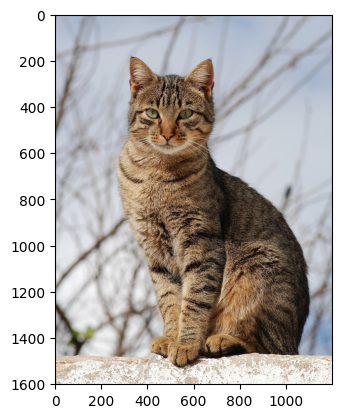

In [65]:
img = cv2.imread('cat.jpg')
img = img[:,:,::-1]
Hung.imshow(img)


## 1. Sử dụng boxFilter: cv2.blur() hoặc cv2.boxFilter() để làm mờ ảnh (sử dụng nhiều thông số filter khác nhau), biểu diễn ảnh gốc và ảnh làm mờ cùng nhau để kiểm chứng.  

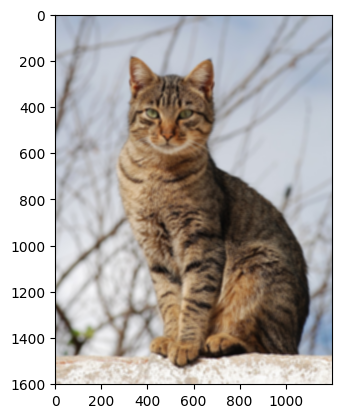

In [66]:
img2 = cv2.blur(img,(11,11))
Hung.imshow(img2)

## 2. Sử dụng Gaussian Filter # Lưu ý: kích thước bộ lọc là số lẻ.

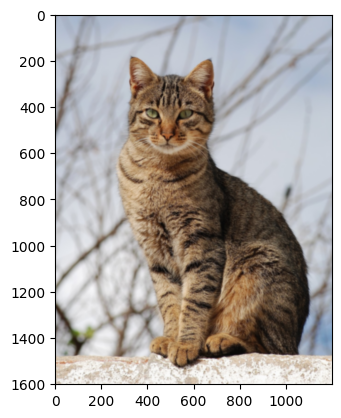

In [67]:
img3 = cv2.GaussianBlur(img,(11,11),0)
Hung.imshow(img3)

## 3. Sử dụng Median Filter 

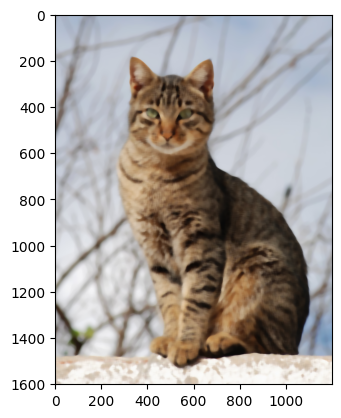

In [68]:
img4 = cv2.medianBlur(img,15,0)
Hung.imshow(img4)

## 4. Kiểm tra lại các bộ lọc trên với hai hình ảnh pepper noise dưới đây: 

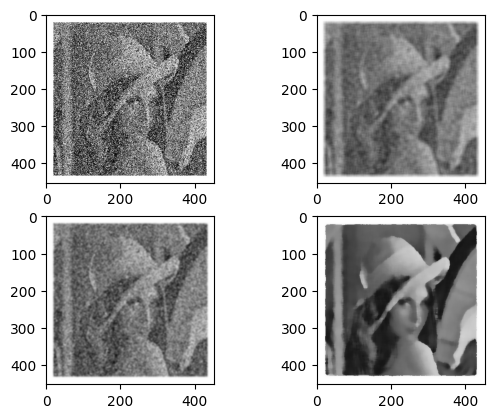

In [69]:
img_pepper01 = cv2.imread("pepper_noise01.jpeg")
img_pepper01 = img_pepper01[:,:,::-1]
Hung.subplot(2,2,1)
Hung.imshow(img_pepper01)

img_pepper01a = cv2.blur(img_pepper01,(11,11))
Hung.subplot(2,2,2)
Hung.imshow(img_pepper01a)

img_pepper01b = cv2.GaussianBlur(img_pepper01,(11,11),0)
Hung.subplot(2,2,3)
Hung.imshow(img_pepper01b)

img_pepper01c = cv2.medianBlur(img_pepper01,15,0)
Hung.subplot(2,2,4)
Hung.imshow(img_pepper01c)


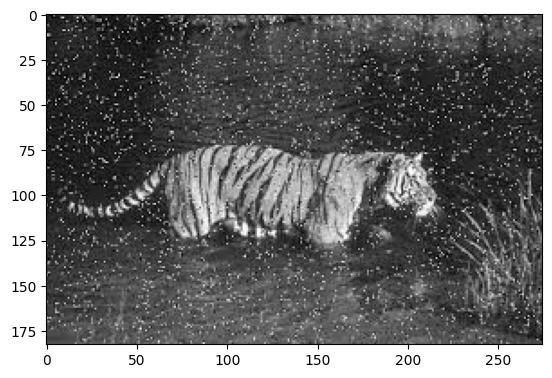

In [70]:
img = cv2.imread("pepper_noise02.jpeg")
blur = cv2.medianBlur(img,5)
blur = cv2.cvtColor(blur, cv2.COLOR_RGB2GRAY)
Hung.imshow(img)

## 7. Bài tập trên lớp lý thuyết: FILTER bằng các phép toán số học và logic Given two images as follow (with different sizes: 193x157 and 194x160) 
- a. Crop two images to size 190x155

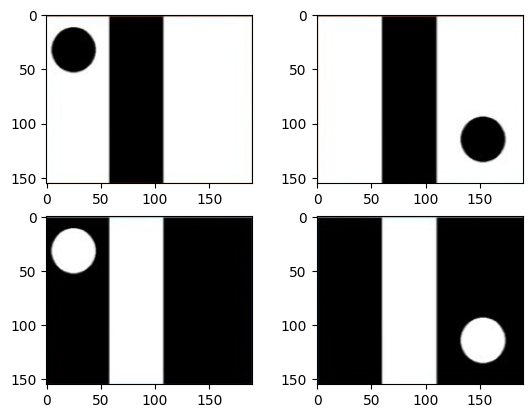

In [71]:
img1 = cv2.imread("exT3_01.jpg")
img2 = cv2.imread("exT3_02.jpg")
img1 = img1[:155,1:191]
img2 = img2[:155,:190]
inv_img1 = cv2.bitwise_not(img1)
inv_img2 = cv2.bitwise_not(img2)

Hung.subplot(2,2,1)
Hung.imshow(img1)
Hung.subplot(2,2,2)
Hung.imshow(img2)
Hung.subplot(2,2,3)
Hung.imshow(inv_img1)
Hung.subplot(2,2,4)
Hung.imshow(inv_img2)

- b. Transform images to negative ones.

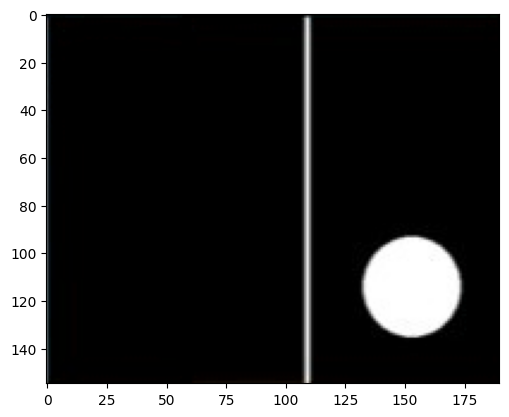

In [72]:
Hung.imshow(cv2.subtract(inv_img2, inv_img1))

- c. Process to have an image which has only the “ball”
Nếu vẫn còn xuất hiện các vạch trắng, cách khắc phục như thế nào?


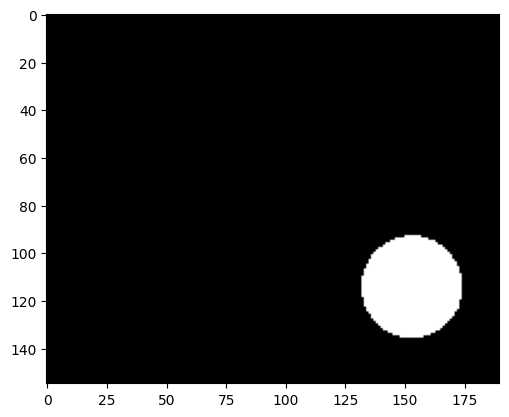

In [73]:

# trừ hai ảnh âm bản để tìm sự khác biệt 
diff = cv2.subtract(inv_img2, inv_img1)
# Chuyển thành ảnh trắng đen tuyệt đối
thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)[1]
# Loại bỏ vạch trắng (Nhiễu) bằng phép toán Opening
kernel = np.ones((5, 5), np.uint8)
# cv2.MORPH_OPEN sẽ xóa các vạch mảnh và giữ lại vật thể lớn (quả bóng)
img5 = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
# Hiển thị kết quả cuối cùng
Hung.imshow(img5)

----

# Một số bài tập mở rộng: 

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Sử dụng Backward, forward, central gradient để lọc ảnh. 

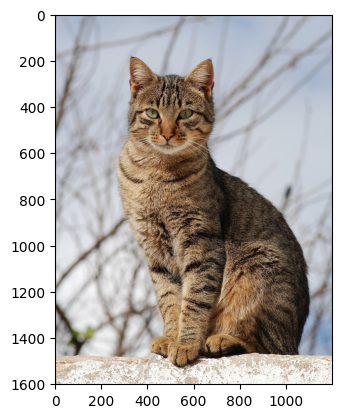

In [75]:
img = cv2.imread('cat.jpg')
img = img[:,:,::-1]
Hung.imshow(img)

### 2. Sử dụng Finite difference filter để lọc ảnh nhiễu. 

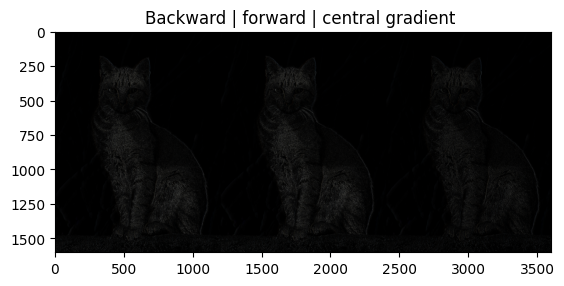

In [76]:
f = cv2.filter2D(img, -1, np.array([[0, -1, 1]]))
b = cv2.filter2D(img, -1, np.array([[-1, 1, 0]]))
c = cv2.filter2D(img, -1, np.array([[-0.5, 0, 0.5]]))

plt.imshow(np.hstack([f, b, c]), 'gray')
plt.title('Backward | forward | central gradient ') 
plt.show()

### 3. Sử dụng Gaussian filter để lọc ảnh. 

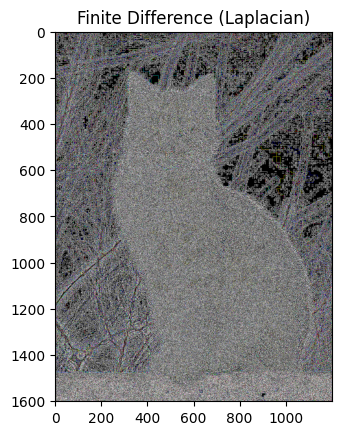

In [77]:
lap = cv2.Laplacian(img, cv2.CV_64F).astype(np.uint8)
plt.imshow(lap, 'gray') 
plt.title('Finite Difference (Laplacian)') 
plt.show()

### 4. Sử dụng Sobel detector để xác định biên của ảnh. 

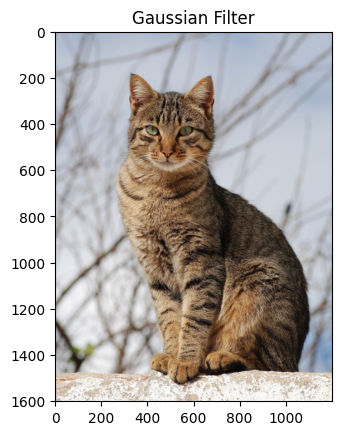

In [78]:
gau = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(gau, 'gray'); plt.title('Gaussian Filter'); plt.show()

### 5. Sử dụng Canny edge detector để xác định các cạnh góc ảnh. 

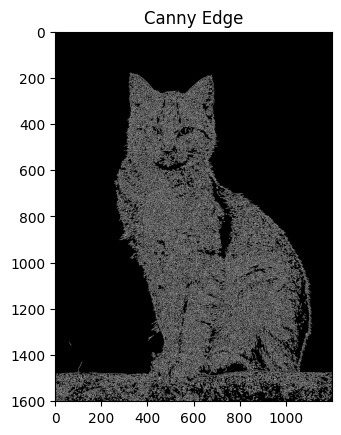

In [79]:
can = cv2.Canny(img, 100, 200)
plt.imshow(can, 'gray'); plt.title('Canny Edge'); plt.show()

### 6. Sử dụng Hough transform để xác định các đường thẳng trong ảnh. 

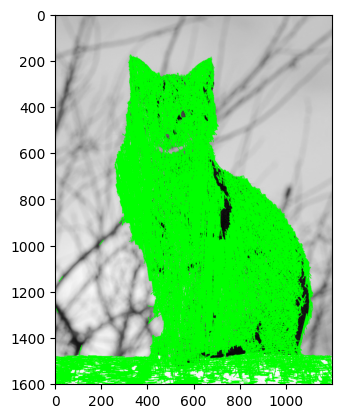

In [80]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150)
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30,minLineLength=20, maxLineGap=10)
out = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
if lines is not None:
    for l in lines:
        x1, y1, x2, y2 = l[0]
        cv2.line(out, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(out)
plt.show()
